In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Part One - Extracting Data With Pandas

As we discussed last week, the 'Read HTML' function in Pandas is an easy way to pull down tables from web pages. We'll be using Wikipedia for a lot of examples in class.

Today we'll be looking at the Wikipedia page showing the median age of every country in the world.

If you need to know more about a function in Python, you can type in a function with a question mark next to it to pull up its documentation (you can also Google the function). The question mark below will pull up the same info you can see at https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.read_html.html

In [2]:
pd.read_html?

The Read HTML function only has one required argument, which is the URL of the page you want to scrape. It will return a **list of dataframes** from that page - essentially it will translate anything on a page that's structured as a table and return it as a **dataframe** to work with.

Below we'll see that there are two dataframes in this list as per the len function, which gives us the length of a variable.

In [3]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_median_age')
print(len(tables))

2


If we add a '0' in brackets after the function, we'll get the first dataframe in the list.

Note that Python uses **0-based indexing** meaning that if you want to access the first item in a list, you reference it with **0** rather than **1**.

In [4]:
pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_median_age')[0]

,0,1,2,3,4
0,Country/Territory,Rank,Average(Years),Male(Years),Female (Years)
1,Afghanistan,208,18.8,18.8,18.9
2,Albania,95,32.9,31.6,34.3
3,Algeria,136,28.1,27.8,28.4
4,American Samoa,122,25.5,25.1,26.0
5,Andorra,10,44.3,44.4,44.1
6,Angola,214,15.9,15.4,16.3
7,Anguilla,79,34.8,32.9,36.7
8,Antigua and Barbuda,102,31.9,30.0,33.5
9,Argentina,105,31.7,30.5,32.9


We can turn the first row into column headers by adding the 'header' argument with the number of the row we want to use as the header.

In [5]:
pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_median_age', header=0)[0]

,Country/Territory,Rank,Average(Years),Male(Years),Female (Years)
0,Afghanistan,208,18.8,18.8,18.9
1,Albania,95,32.9,31.6,34.3
2,Algeria,136,28.1,27.8,28.4
3,American Samoa,122,25.5,25.1,26.0
4,Andorra,10,44.3,44.4,44.1
5,Angola,214,15.9,15.4,16.3
6,Anguilla,79,34.8,32.9,36.7
7,Antigua and Barbuda,102,31.9,30.0,33.5
8,Argentina,105,31.7,30.5,32.9
9,Armenia,80,35.1,33.3,36.9


Now we can turn this into a local dataframe and work with it!

In [6]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_median_age', header=0)[0]

As we covered last week, we can use the 'head' function to preview the first five rows of the dataframe.

In [7]:
df.head()

,Country/Territory,Rank,Average(Years),Male(Years),Female (Years)
0,Afghanistan,208,18.8,18.8,18.9
1,Albania,95,32.9,31.6,34.3
2,Algeria,136,28.1,27.8,28.4
3,American Samoa,122,25.5,25.1,26.0
4,Andorra,10,44.3,44.4,44.1


## Part Two - Data Visualization

Now that we've seen our way around Pandas, we can look at some actual data using the techniques and metrics we saw in the lecture.

The 'Average(Years)' column in our dataframe is the median age for every country in the world. Let's see what the distribution is like and find out more about it.

First, let's plot a histogram to see the distribution using Seaborn and Matplotlib. Matplotlib is a core Python visualization library while Seaborn is a package built on top of it. You could go a mile deep into what these two packages are capable of, as you'll see in the readings this week. We want to keep it simple without it getting overwhelming for now. We'll learn the new tools as we need them.

(array([ 28.,  27.,  29.,  33.,  28.,  24.,  25.,  32.,   3.,   1.]),
 array([ 15.4 ,  19.17,  22.94,  26.71,  30.48,  34.25,  38.02,  41.79,
         45.56,  49.33,  53.1 ]),
 <a list of 10 Patch objects>)

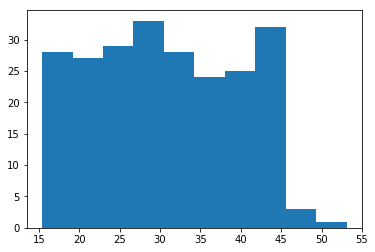

In [8]:
#Plot a Histogram
plt.hist(df['Average(Years)'])

Looks like the median ages of countries are pretty evenly dispersed between ages 15 and 45, with a few countries that might have a higher age.

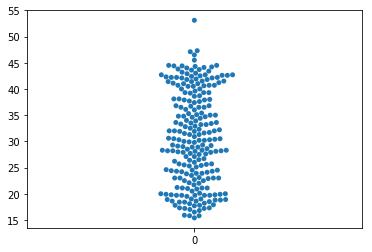

In [9]:
#Plot a Swarmplot
sns.swarmplot(data=df['Average(Years)'])

The swarmplot shows us that there's a country with an age between 50 and 55 that really sticks out.

{'boxes': [<matplotlib.lines.Line2D at 0x117fcad68>],
 'caps': [<matplotlib.lines.Line2D at 0x117fe1780>,
 'fliers': [<matplotlib.lines.Line2D at 0x117fe8f60>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x117fe8198>],
 'whiskers': [<matplotlib.lines.Line2D at 0x117fcaf28>,
  <matplotlib.lines.Line2D at 0x117fd7f28>]}

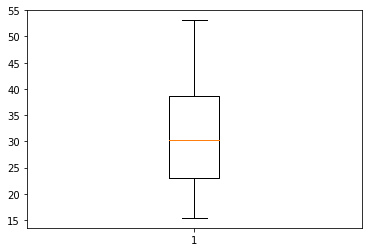

In [10]:
#Plot a Boxplot
plt.boxplot(x=df['Average(Years)'])

The boxplot shows that the country with the median age of 55 isn't officially considered an outlier.

Hopefully you can see how using multiple visualizations can give you a more complete understanding of your distribution!

## Part Three - Summary Statistics

First, let's get the mean and median values of our dataset.

In [11]:
#Mean
np.mean(df['Average(Years)'])

30.738695652173924

In [12]:
#Median
np.median(df['Average(Years)'])

30.300000000000001

The mean and the median being close make sense, since the data is fairly evenly distributed (had the data been highly skewed, the mean and the median would be further apart).

Now let's look at the variance and standard deviation.

In [13]:
#Variance
np.var(df['Average(Years)'])

78.67019829867668

In [14]:
#Standard Deviation
np.std(df['Average(Years)'])

8.869622218486912

These numbers don't really provide much information by themselves.

In [15]:
np.sqrt(np.var(df['Average(Years)']))

8.8696222184869118

Here we can see that the square root of the variance is indeed the standard deviation.

In [16]:
total_variance = 0
for i in df['Average(Years)']:
    deviation = i - df['Average(Years)'].mean()
    squared_deviation = np.power(deviation, 2)
    total_variance += squared_deviation
print(total_variance/len(df['Average(Years)']))

78.6701982987


For those curious, above is the variance executed by 'hand'. Note that this is the same value as the variance calculated above.

In [17]:
#Maximum
np.max(df['Average(Years)'])

53.100000000000001

In [18]:
#Minimum
np.min(df['Average(Years)'])

15.4

In [19]:
#Range
np.max(df['Average(Years)']) - np.min(df['Average(Years)'])

37.700000000000003

Above is the maximum, minimum, and range.

In [20]:
#First Quartile
df['Average(Years)'].quantile(0.25)

23.0

In [21]:
#Second Quartile
df['Average(Years)'].quantile(0.5)

30.3

In [22]:
#Third Quartile
df['Average(Years)'].quantile(0.75)

38.675000000000004

In [23]:
#Interquartile Range
df['Average(Years)'].quantile(0.75) - df['Average(Years)'].quantile(0.25)

15.675000000000004

Above are the first, second, and third quartiles. A few things here:

* Note that the value of the second quartile is equivalent to the median which we found earlier.
* Note that the difference between the first quartile and second quartile and the difference between the second quratile and third quartile are pretty close to each other, confirming that the data is pretty evenly distributed between these quartiles. The difference between the minimum value and the first quartile is also pretty close these values, however the diference between the third quartile and the maximum value is slightly larger than these, confirming our visual understanding that this distribution is fairly uniform besides a few high outliers.

Note that below is the unofficial equation for what constitutes a cutoff - anything above this value is technically an outlier.

In [24]:
np.percentile(df['Average(Years)'], q=75) + (np.percentile(df['Average(Years)'], q=75) - np.percentile(df['Average(Years)'], q=25)) * 1.5

62.187500000000014

And anything below this value is techincally an outlier. Obviously someone's age can't be negative, so this measure isn't perfect in this case.

In [25]:
np.percentile(df['Average(Years)'], q=25) - (np.percentile(df['Average(Years)'], q=75) - np.percentile(df['Average(Years)'], q=25)) * 1.5

-0.51250000000000639

## Part Four - Pandas Wrangling

Now we can do some brief Pandas wrangling to find out a few things. First we can see which country had the highest median age.

In [26]:
#Maximum Median Age as Found Earlier
np.max(df['Average(Years)'])

53.100000000000001

Here we can do a query within Pandas to see which row has a median age of 53.1. The below statement is a Boolean statement which is checking whether every row of the Dataframe has a median age equal to 53.1

In [27]:
df['Average(Years)'] == 53.1

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
200    False
201    False
202    False
203    False
204    False
205    False
206    False
207    False
208    False
209    False
210    False
211    False
212    False
213    False
214    False
215    False
216    False
217    False
218    False
219    False
220    False
221    False
222    False
223    False
224    False
225    False
226    False
227    False
228    False
229    False
Name: Average(Years), Length: 230, dtype: bool

We can query the dataframe to see where the above Boolean statement is true.

In [28]:
df[df['Average(Years)'] == 53.1]

,Country/Territory,Rank,Average(Years),Male(Years),Female (Years)
137,Monaco,1,53.1,51.7,54.5


Here it is - one step shorter.

In [29]:
#Country With Maximum Median Age
df[df['Average(Years)'] == np.max(df['Average(Years)'])]

,Country/Territory,Rank,Average(Years),Male(Years),Female (Years)
137,Monaco,1,53.1,51.7,54.5


In [30]:
#Country With Minimum Median Age
df[df['Average(Years)'] == np.min(df['Average(Years)'])]

,Country/Territory,Rank,Average(Years),Male(Years),Female (Years)
151,Niger,230,15.4,15.3,15.5


We can also input different numbers by value - for example below we'll see which countries had a median age above 45.

In [31]:
df[df['Average(Years)'] >= 45]

,Country/Territory,Rank,Average(Years),Male(Years),Female (Years)
77,Germany,3,47.1,46.0,48.2
101,Italy,5,45.5,44.4,46.5
103,Japan,2,47.3,46.0,48.7
137,Monaco,1,53.1,51.7,54.5
174,Saint Pierre and Miquelon,4,46.5,46.0,47.0


And below are all countries with a median age below 17.

In [32]:
df[df['Average(Years)'] <= 17]

,Country/Territory,Rank,Average(Years),Male(Years),Female (Years)
5,Angola,214,15.9,15.4,16.3
33,Burundi,224,17.0,16.8,17.3
126,Malawi,227,16.5,16.4,16.7
129,Mali,228,15.8,15.1,16.4
151,Niger,230,15.4,15.3,15.5
212,Uganda,229,15.8,15.7,15.9
228,Zambia,226,16.8,16.6,16.9


We can also query for more than one condition.

In [33]:
df[(df['Average(Years)'] >= 35) & (df['Average(Years)'] <= 40)]

,Country/Territory,Rank,Average(Years),Male(Years),Female (Years)
9,Armenia,80,35.1,33.3,36.9
10,Aruba,55,39.3,37.5,41.1
11,Australia,58,38.7,37.9,39.5
17,Barbados,59,38.6,37.5,39.8
18,Belarus,51,40.0,37.1,43.1
28,British Virgin Islands,72,36.5,36.3,36.6
38,Cayman Islands,52,40.0,39.3,40.7
42,China,67,37.4,36.5,38.4
47,Cook Islands,74,36.5,36.0,37.0
52,Curacao,73,36.1,33.5,39.7


## Part Five - Grouped Data

Now we'll import the associated continents for each country to look at this data by continent. We'll use the 'Read CSV' function, which reads in a CSV file.

In [34]:
continents = pd.read_csv('continents.csv')
continents.head()

,Country(or dependent territory),Continent
0,Nigeria,Africa
1,Ethiopia,Africa
2,Egypt,Africa
3,Democratic Republic of the Congo,Africa
4,South Africa,Africa


We can add this information using the merge function (this isn't vital to know right now).

In [35]:
new_df = df.merge(continents, how='inner', left_on='Country/Territory', right_on='Country(or dependent territory)')
new_df = new_df[['Country/Territory', 'Average(Years)', 'Male(Years)','Female (Years)','Continent']]
new_df.head()

,Country/Territory,Average(Years),Male(Years),Female (Years),Continent
0,Afghanistan,18.8,18.8,18.9,Asia
1,Albania,32.9,31.6,34.3,Europe
2,Algeria,28.1,27.8,28.4,Africa
3,American Samoa,25.5,25.1,26.0,Oceania
4,Andorra,44.3,44.4,44.1,Europe


We can see how many countries are in each continent by using the 'value counts' function.

In [36]:
new_df['Continent'].value_counts()

Europe           54
Africa           50
Asia             48
North America    33
Oceania          21
South America    12
Name: Continent, dtype: int64

We can also use the "normalize" argument to see the percentage of total countries in each continent.

In [37]:
new_df['Continent'].value_counts(normalize=True)

Europe           0.247706
Africa           0.229358
Asia             0.220183
North America    0.151376
Oceania          0.096330
South America    0.055046
Name: Continent, dtype: float64

We can single out a single continent by using the code below.

In [38]:
new_df[new_df['Continent'] == 'Asia'].head()

,Country/Territory,Average(Years),Male(Years),Female (Years),Continent
0,Afghanistan,18.8,18.8,18.9,Asia
9,Armenia,35.1,33.3,36.9,Asia
13,Azerbaijan,31.3,29.8,33.0,Asia
15,Bahrain,32.3,33.8,29.5,Asia
16,Bangladesh,26.7,26.0,27.3,Asia


Again, just like before, we can run multiple queries

We can do a **groupby** function to get the average age, variance, and standard deviation for each continent.

In [39]:
new_df.groupby('Continent')['Average(Years)'].mean()

Continent
Africa           20.728000
Asia             30.310417
Europe           40.575926
North America    33.327273
Oceania          28.538095
South America    29.633333
Name: Average(Years), dtype: float64

In [40]:
new_df.groupby('Continent')['Average(Years)'].median()

Continent
Africa           19.70
Asia             30.05
Europe           41.60
North America    33.50
Oceania          26.40
South America    29.05
Name: Average(Years), dtype: float64

In [41]:
new_df.groupby('Continent')['Average(Years)'].var()

Continent
Africa           22.464914
Asia             40.843932
Europe           19.169410
North America    42.150170
Oceania          28.907476
South America    10.184242
Name: Average(Years), dtype: float64

In [42]:
new_df.groupby('Continent')['Average(Years)'].std()

Continent
Africa           4.739717
Asia             6.390926
Europe           4.378288
North America    6.492316
Oceania          5.376567
South America    3.191276
Name: Average(Years), dtype: float64

Earlier we said that a variance or standard deviation on its own wasn't incredibly valuable - however now we can compare standard deviations and variances between continents!

We can lay the histograms for each of the continents on top of each other using a for loop.

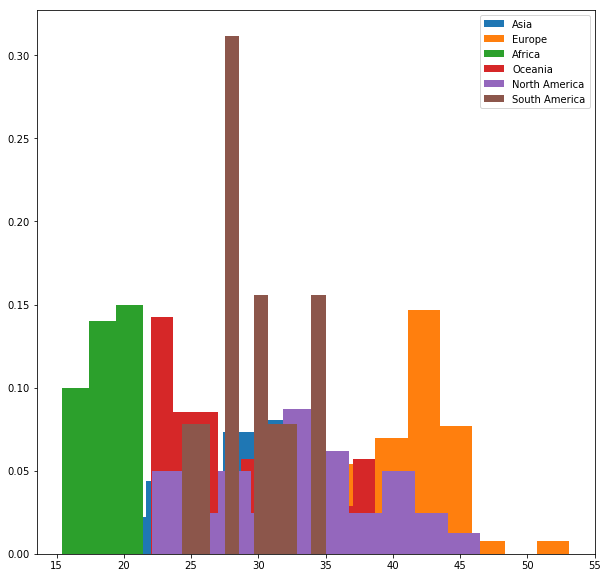

In [43]:
#Note this top piece of code that will make the image bigger.
fig = plt.figure(figsize=(10,10))
for continent in new_df['Continent'].unique():
    plt.hist(new_df[new_df['Continent'] == continent]['Average(Years)'], normed=True)
plt.gca().legend(new_df['Continent'].unique())

Unfortunately this looks extremely cluttered and isn't really helpful in our analysis. Histograms aren't great for this. Let's try a bee swarm and box plot. Look below - what information can we gather from these

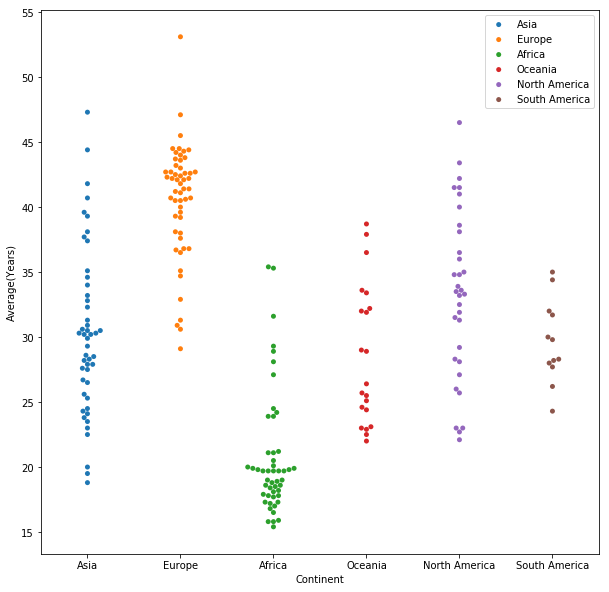

In [44]:
fig = plt.figure(figsize=(10,10))
sns.swarmplot(x='Continent', y='Average(Years)', data=new_df)
plt.gca().legend(new_df['Continent'].unique())

/Users/evanagovino/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


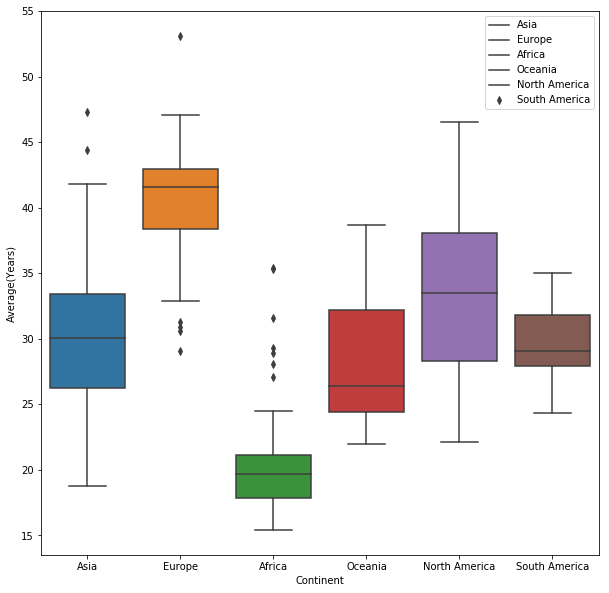

In [45]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x='Continent', y='Average(Years)', data=new_df)
plt.gca().legend(new_df['Continent'].unique())

## Part Six - Your Turn

Now it's your turn! You'll be looking at the difference between the median lifespan of females compared to the median lifespan of males for each country in the world.

In [46]:
new_df['Female_Minus_Male'] = new_df['Female (Years)'] - new_df['Male(Years)'] 

#### 1. Plot the histogram, swarmplot and boxplot of this column. How does this histogram differ from the histogram we saw of the median age above? Are there any outliers?

#### 2. Find the mean, median, variance, standard deviation, maximum, minimum, range, and Interquartile Range of this column.

#### 3. Which country has the longest lifespan for females compared to males? Which country has the longest lifespan for males compared to females? Which countries are outliers? What constitutes the cutoff for an outlier in this case?

#### 4. Find the mean, median, and standard deviation of the data grouped by continent. Which continent has the highest absolute difference between its mean and median? What does the difference between mean and median say about the distribution of values for that continent?

#### 5. Plot a swarmplot and boxplot of the data grouped by continent.

#### 6. Given your observations from the previous two questions, what may be a cause of why the continent with the largest spread is that way? Hint: Look at the outliers for that country.

## Part Seven - Extra Data Wrangling

Some of these functions were beyond our crash course, but will be useful for this week's homework and beyond.

The 'describe' command can quickly pull out some relevant information that we looked at earlier.

In [47]:
new_df.describe()

,Average(Years),Male(Years),Female (Years),Female_Minus_Male
count,218.000000,218.000000,218.000000,218.000000
mean,30.904128,30.130275,31.639908,1.509633
std,8.760002,8.357557,9.232147,1.799859
min,15.400000,15.100000,15.500000,-7.100000
25%,23.825000,23.125000,24.050000,0.500000
50%,30.550000,29.850000,31.050000,1.350000
75%,38.475000,37.025000,39.875000,2.375000
max,53.100000,51.700000,54.500000,7.400000


We can filter our dataframe by looking at, for example, just countries where the male median age is higher than the female median age.

In [48]:
new_df[new_df['Male(Years)'] > new_df['Female (Years)']]

,Country/Territory,Average(Years),Male(Years),Female (Years),Continent,Female_Minus_Male
4,Andorra,44.3,44.4,44.1,Europe,-0.3
15,Bahrain,32.3,33.8,29.5,Asia,-4.3
23,Bhutan,27.6,28.2,27.1,Asia,-1.1
74,Greenland,33.9,35.0,32.7,North America,-2.3
98,Jordan,22.5,22.9,22.0,Asia,-0.9
106,Kuwait,29.3,30.4,27.4,Asia,-3.0
113,Libya,28.9,29.1,28.7,Africa,-0.4
117,Macau,39.3,39.5,39.1,Asia,-0.4
137,Nauru,26.4,27.0,25.7,Oceania,-1.3
147,Oman,25.6,26.6,24.2,Asia,-2.4


We can also run functions on entire series such as multiplication or division. We can even multiply, add, subtract or divide numerical columns by each other and form new columns with them.

In [49]:
(new_df['Female (Years)'] / 2).head()

0     9.45
1    17.15
2    14.20
3    13.00
4    22.05
Name: Female (Years), dtype: float64

We can use numpy's 'power' function to square a series

In [50]:
(np.power(new_df['Female (Years)'], 2)).head()

0     357.21
1    1176.49
2     806.56
3     676.00
4    1944.81
Name: Female (Years), dtype: float64

You can also groupby more than one feature (hint for the homework)

In [51]:
new_df.groupby(['Continent', 'Country/Territory'])['Female_Minus_Male'].mean()

Continent      Country/Territory               
Africa         Algeria                             0.6
               Angola                              0.9
               Benin                               0.7
               Botswana                            2.1
               Burkina Faso                        0.3
               Burundi                             0.5
               Cameroon                            0.3
               Central African Republic            0.6
               Chad                                2.0
               Comoros                             1.3
               Democratic Republic of the Congo    0.5
               Djibouti                            3.2
               Egypt                               0.6
               Equatorial Guinea                   1.0
               Eritrea                             0.9
               Ethiopia                            0.4
               Gabon                               0.4
               Gh